# Workshop 5. Рекомендательная система

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция 8. Рекомендательный системы](https://www.youtube.com/watch?v=Te_6TqEhyTI&t=4s).
- [Туториал по рекомендательным системам](http://nbviewer.jupyter.org/urls/gitlab.7bits.it/isiganov/ml-course/raw/master/week05/theory/05-01-clustering.ipynb?inline=false)

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

В этой практике мы попробуем построить очень простую рекомендательную систему, основанную на поиске кластера похожих пользователей.  
Похожие они в том плане, что смотрят одинаковые фильмы и оценивают их приблизительно одинаково.  
Мы будем строить очень простую модель, по сути которая даже не является именно системой рекомендации, но как минимум она может быть первым шагом к ее построению: мы найдем класет похожих пользователей, узнаем какие фильмы они смотрят и одинаково любят, какие жанры предпочитают.

Лабораторная будет больше похожа на манипулции с одним большим датафреймом. Если у вас появятся интересные идеи, то можете попробовать их тоже. 

## Анализ отзывов аниме

Возьмем датасет с рейтингами аниме: https://www.kaggle.com/CooperUnion/anime-recommendations-database  
Кстати, вы можете посмотреть kernels - это jupyter notebooks, в которых другие люди тоже делали что-то с этим датасетом.

```
Anime.csv

anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
genre - comma separated list of genres for this anime.
type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
rating - average rating out of 10 for this anime.
members - number of community members that are in this anime's "group".


Rating.csv

user_id - non identifiable randomly generated user id.
anime_id - the anime that this user has rated.
rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).
```

In [1]:
import pandas as pd

In [2]:
!ls

anime = pd.read_csv('data/anime/anime.csv.zip', index_col='anime_id')
anime.dropna(inplace=True)
print(anime.shape)
anime.head()

adult.csv.gz
data
Homework_1.ipynb
titanic_train.csv
week04_homework_04-01-clustering-homework.ipynb
week04_workshop_04-01-clustering-workshop.ipynb
week05_workshop_05-01-clustering-workshop.ipynb
week05_workshop_05-01-clustering-workshop.ipynb.invalid
week2_homework_02-01-homework-numpy.ipynb
week2_homework_02-02-homework-pandas.ipynb
week2_workshop_02-01-workshop-numpy.ipynb
week2_workshop_02-02-workshop-pandas.ipynb
week3_homework_03-01-visualisation-homework.ipynb
week3_workshop_03-01-visualisation-workshop.ipynb
Workshop_1.ipynb
(12017, 6)


,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
ratings = pd.read_csv('data/anime/rating.csv.zip')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## Обзор данных

Постройте графики для обзора признаков: anime.type, episodes, rating, members.

Посмотрите на info по таблицам, нам важно знать сколько оперативной памяти занимает каждая таблица, так как дальше у нас будет декартово произведение таблиц и размер может вылететь за 5 гигабайт.

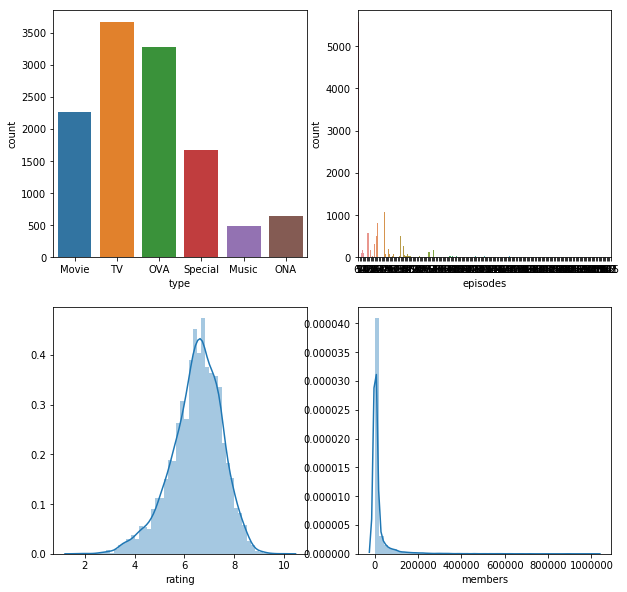

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df1 = anime

#sns.pairplot(df1['type', 'episodes', 'rating', 'members'])
#sns.scatterplot(x='type', y = 'episodes', data=df1)
#df1 = df1.loc[df1['episodes'] != 'Unknown']

#df1.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
#df1.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
#df1.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])
#df1.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

#df1.replace('Unknown', -1)

#df1['episodes']

#df1.loc[df1['episodes'] > 5000]

#anime['episodes']


#grid = plt.GridSpec(2, 2, wspace=0.4)

#plt.subplot(2, 1, 1)
#graph1 =sns.countplot(df1.episodes)
#plt.subplot(2, 1, 2)
#graph2 = sns.distplot(df1.rating)
#plt.show()

fig, ax = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
sns.countplot(df1.type, ax=ax[0][0])
sns.countplot(df1.episodes, ax=ax[0][1])
sns.distplot(df1.rating, ax=ax[1][0])
sns.distplot(df1.members, ax=ax[1][1])

#graph1 = sns.scatterplot(x=df1['type'], y=df1['members'], data=df1)
#sns.countplot(df1.episodes)
#graph3 = sns.distplot(df1.rating)
#graph1.show()
#sns.countplot(anime.members)

## Жанры

Как в материалах к воркшопу постройте таблицу, в которой в строках будет названиефильма, а в столбцах жанр. В ячейках 1 - если в этого фильма есть такой жанр и 0 иначе.

Постройте countplot для визуализации количества фильмов каждого из жанров.

Постройте график, на котором будут изображениы распределения рейтингов по каждому из жанров. Должно получиться что-то подобное: ![Imgur](https://i.imgur.com/hyuA6ia.png)

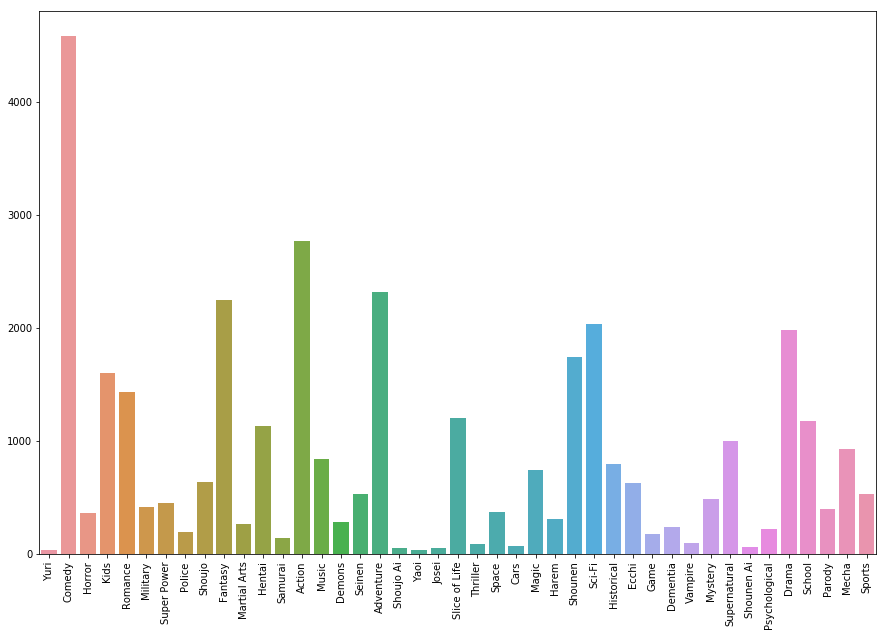

In [6]:
import numpy as np

from itertools import chain

def flatmap(f, items):
    return chain.from_iterable(map(f, items))

def genre_splitter(genre_names):
    return genre_names.split(", ")

m_uniq = anime['genre'].unique() 
genres = set(flatmap(genre_splitter, m_uniq))

genres = list(genres)

anime_genres = pd.DataFrame(index=anime.index)
for g in genres:
    anime_genres[g] = anime['genre'].str.contains(g).astype(int)

plt.subplots(figsize=(15,10))
genre_distr = sns.barplot(x = anime_genres.columns, y=anime_genres.sum(axis=0))
t = genre_distr.set_xticklabels(genre_distr.get_xticklabels(), rotation=90)


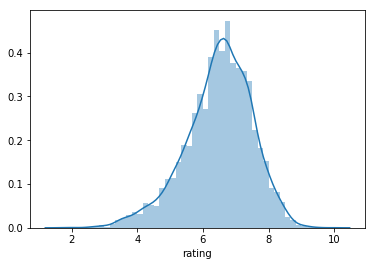

In [17]:
#ratings2 = ratings.loc[ratings['rating'] > -1]
#df_m = ratings2.join(anime_genres, on='anime_id').drop(['anime_id'], axis=1)

df2 = df1.drop(['name', 'genre', 'type', 'episodes', 'members'], axis=1)
df2
#df2['anime_id'] = df1['anime_id']
#df2['rating'] = df1['rating']

df_m = df2.join(anime_genres, on='anime_id')
sns.distplot(df_m['rating'])
#hy
#df_m = ratings.join(anime_genres, on='anime_id')#.drop(['anime_id'], axis=1)
#df_m[genres] = df_m[genres].multiply(df_m['rating'], axis='index')
#df_m = df_m.drop(['rating'], axis=1).replace(0, np.NaN) # чтобы посчитать mean без учета непросмотренных фильмов
#df_m.head()

#df_m

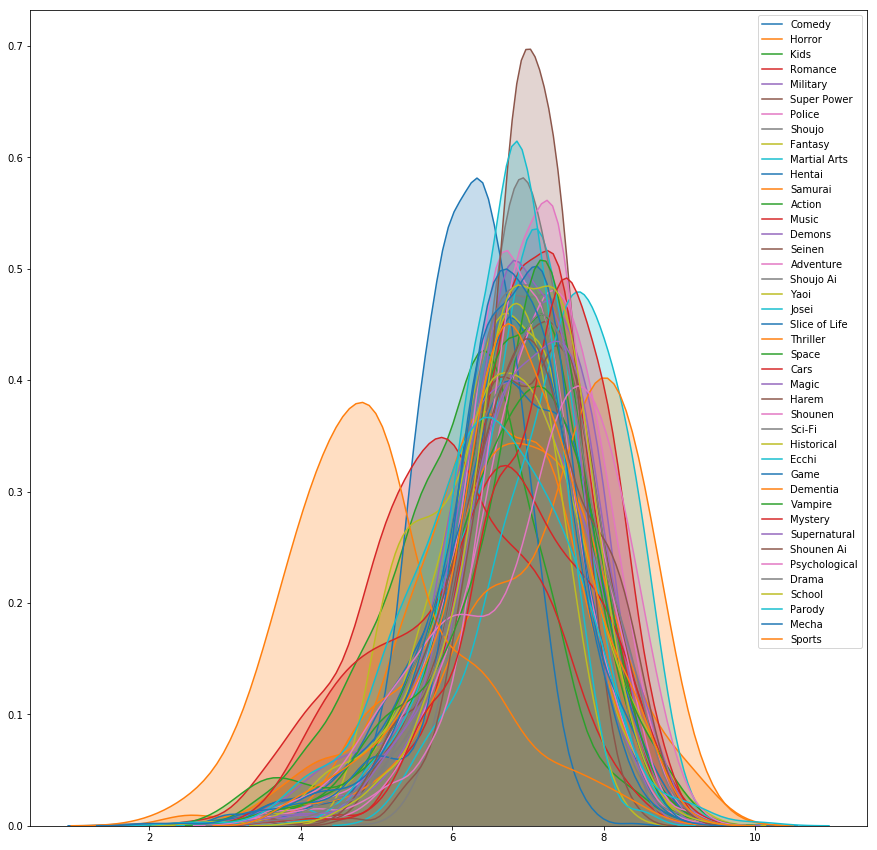

In [37]:
#df_m = df_m.loc[df_m['rating'] > -1]

plt.subplots(figsize=(15,15))
with sns.color_palette("cubehelix", 44):
    for genre in df_m.columns[2:]:
        sns.kdeplot(df_m.loc[df_m[genre] == 1].rating, shade=True, label = genre)
#sns.kdeplot(df_m.loc[df_m['Yuri'] == 1].rating, shade=True)
#sns.kdeplot(df_m.loc[df_m['Action'] == 1].rating, shade=True)
#df_m

ValueError: color kwarg must have one color per data set. 1 data sets and 45 colors were provided

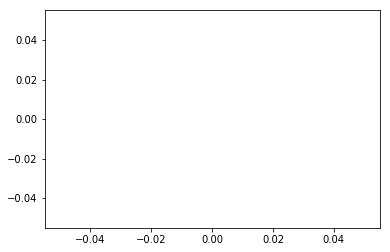

In [9]:
sns.distplot(df_m)

## Рейтинг

Постройте график, показывающий сколько оценок каждого рейтинга поставили пользователи из таблицы `ratings`.

## Фильтрация данных

Если мы сразу же построим кросстаб матрицу `anime` vs `user`, где в ячейках рейтинг, который поставил юзер этому фильму, то у нас это все займет около 6 гигабайт памяти. Можно значительно сократить размер матрицы, если выкинуть данные об аниме, которое почти никто не оценил и юзеров, которые почти ничего не оценивали.

Для этого постройте два новых датафрейма:

- anime_watches, где индексом является anime_name, а значением - количество его обзоров
- user_ratings, где индексом является user_id, а значением - количество вниме, которое он оценил.

Далее, соедините (join) 4 таблицы: ratings, anime, anime_watches, user_ratings и назовите новую таблицу anime_ratings.

Что означает `-1` в таблице рейтинга? Замените все -1 на средний рейтинг аниме.

Удалите из таблицы все те значения, у которых количество обзоров и рейтингов меньше медианного значения. То есть мы удалим половину аниме и половину юзеров.

## Матрица user-item

Превратите таблицу anime_ratings в матрицу, где в строках user_id, в стобцах anime_name, а в ячейках рейтинг. Посмотрите сколько занимет в памяти эта матрица.

## Понижение размерности

kNN будет плохо работать на многомерных данных, поэтому надо понизить размерности матрицы с помощью алгоритма PCA. Количество размерностей установите от 4 до 10 - как вам покажется оптимальнее. (можете это исправить когда запустите kNN и получите результаты).

## Обучение kNN

Обучим kNN, чтобы он нашел нам центры кластеров нашей выборки.

Так как в строках у нас user_id, то центры класетров - это будут характеристики пользователей в терминах их оценок аниме. Используя эту информацию мы можем вычислить список характерных аниме для конкретного кластера.

- обучите kNN
- создайте копию матрицы и добавьте новую колонку - кластер. Положите в нее результат предсказания кластера для каждого пользователя. (метод predict)
- нарисуйте cout plot количества юзеров в каждом кластере. Если получается сильно неравномерное распределение, то вам надо подобрать другое количество кластеров или изменить размерность в предыдущем шаге.

## Top 15 аниме

Найдем Top-15 аниме для каждого кластера. Для этого:

- найдите средний рейтинг аниме в каждом кластере. 
- для каждого кластера возьмите набор аниме с их средним рейтингом, отсортируйте этот набор по убыванию рейтинга. 
- возьмите первые 15 элементов из набора - это и будет топ15 аниме в кластере.
- согласны ли вы с содержимым кластера?

## Top 5 жанров

Если соеднить таблицу с аниме с таблицей жанров, то можно найти топ жанров для каждого кластера. Придумайте сами как это сделать, так как тут много способов:

- найти средний рейтинг для аниме каждого жанра
- посчитать сколько представителей каждого жанра есть среди top100 аниме кластера (кстати работает лучше)
- ???